# GDP to life expectancy analysis #
This analysis is to determine the relationship between life expectancy, and GDP, in addition to temporal factors like years, and countries. One key question is "Is high GDP related to higher standard of living, or is it rather being a historically developed country that matters when trying to predict living standards".

In [46]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('bright')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

#set directory
os.chdir('C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio')
path = "C:\\Users\\tgsog\\OneDrive\\Desktop\\Project portfolio\\Python projects\\life expectancy -GDP\\all_data.csv"
df = pd.read_csv(path)

In [47]:
df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [48]:
clist = [x for x in df.Country.unique()]
print(clist)

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


In [49]:
df.GDP[1]

70979923960.0

In [50]:
Chile=df[df.Country =="Chile"]
China=df[df.Country =="China"]
Germany=df[df.Country =="Germany"]
Mexico=df[df.Country =="Mexico"]
US= df[df.Country =="United States of America"]
Zimbabwe=df[df.Country =="Zimbabwe"]

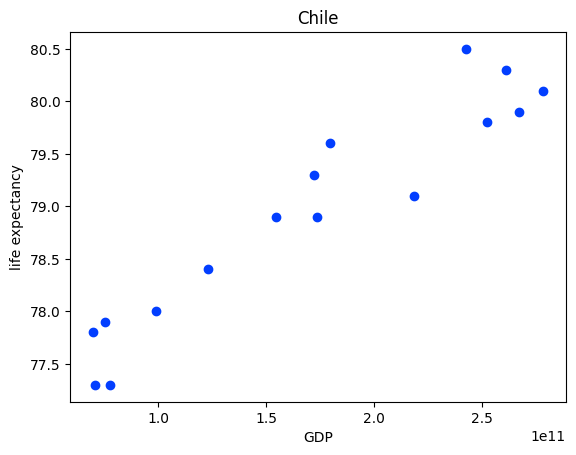

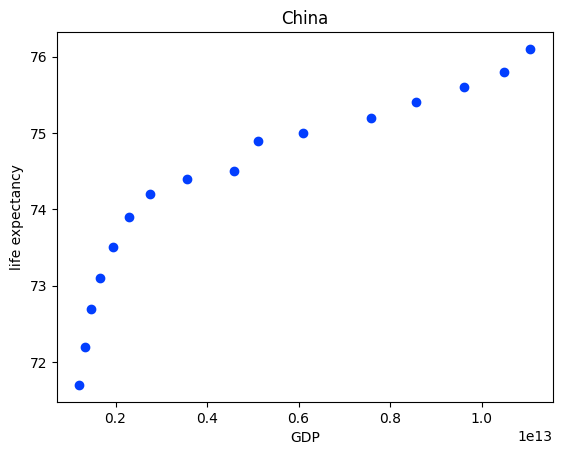

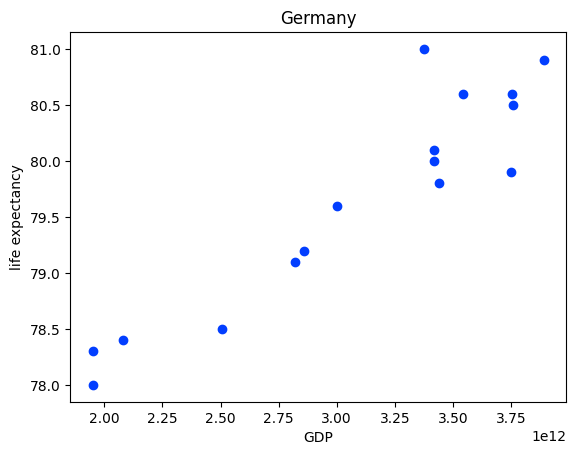

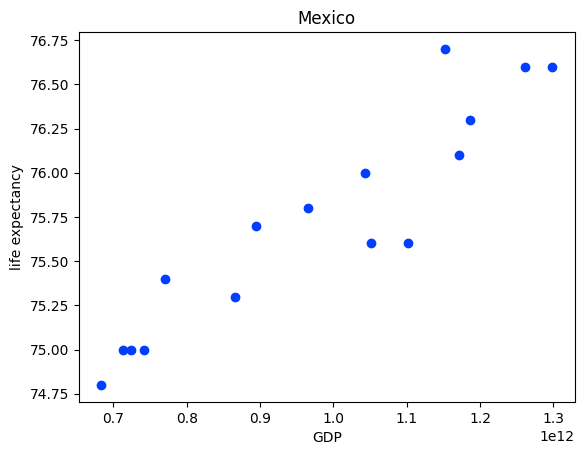

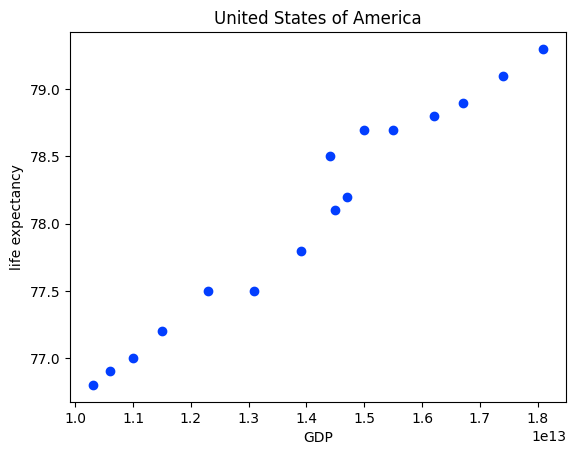

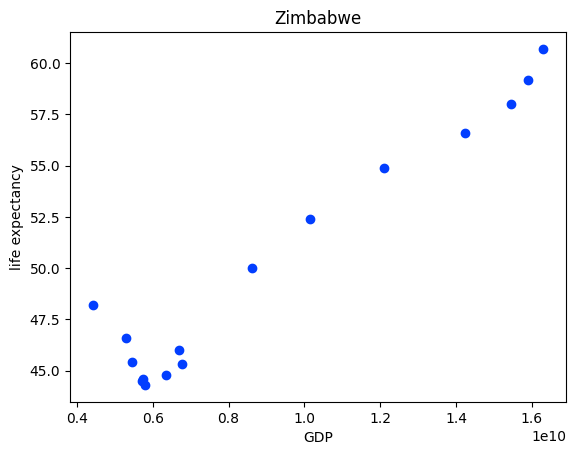

In [51]:
for con in clist:
    country =df[df.Country ==con]
    plt.scatter(country["GDP"], country["Life expectancy at birth (years)"])
    plt.title(con)
    plt.xlabel("GDP")
    plt.ylabel("life expectancy")
    plt.show()
    plt.close()

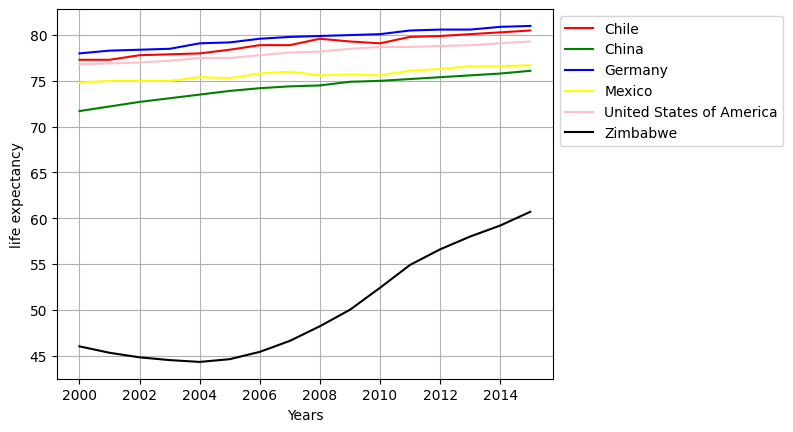

In [52]:
count = 0
for con in clist:
    country =df[df.Country ==con]
    colors = ["red","green","blue","yellow","pink","black"]
    plt.plot(country.Year, country["Life expectancy at birth (years)"], color = colors[count], label = con)
    count+=1
    plt.xlabel("Years")
    plt.ylabel("life expectancy")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
plt.close()

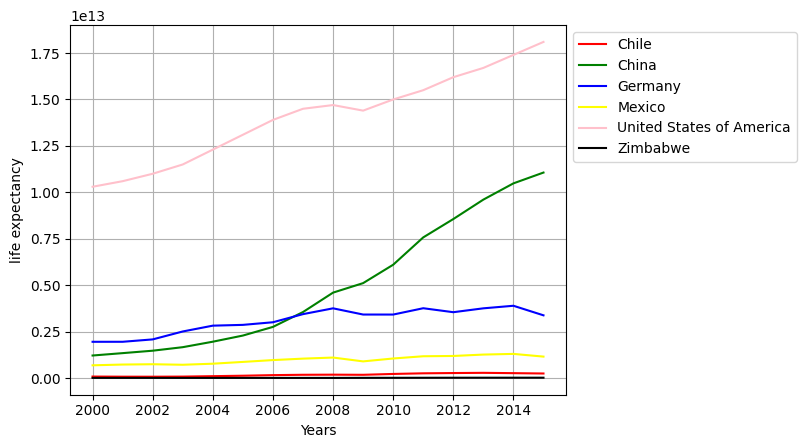

In [53]:
count = 0
for con in clist:
    country =df[df.Country ==con]
    colors = ["red","green","blue","yellow","pink","black"]
    plt.plot(country.Year, country["GDP"], color = colors[count], label = con)
    count+=1
    plt.xlabel("Years")
    plt.ylabel("life expectancy")
    plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.close()

## Distributions - univatiate analysis

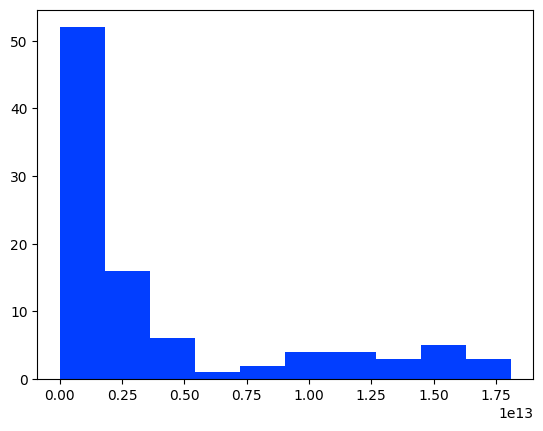

In [54]:
plt.hist(df.GDP)
plt.show()
plt.close()
#reminds me of a poisson distribution

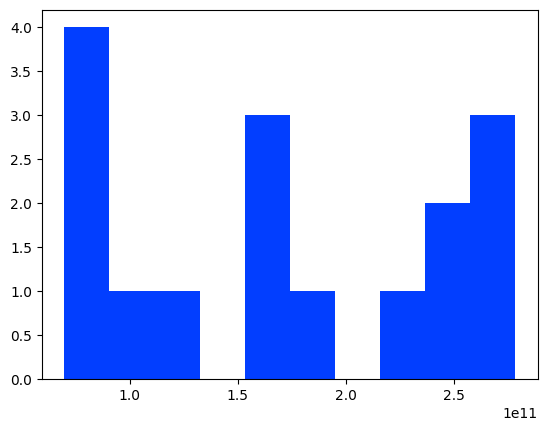

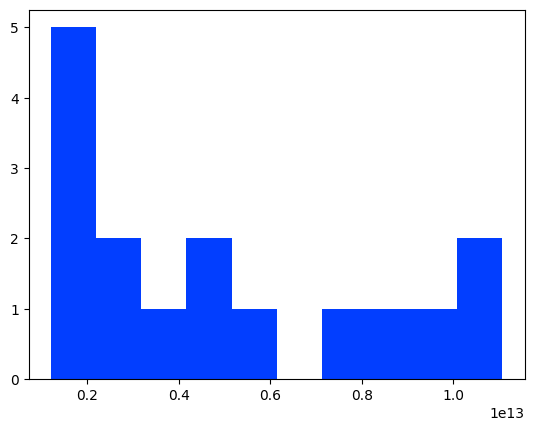

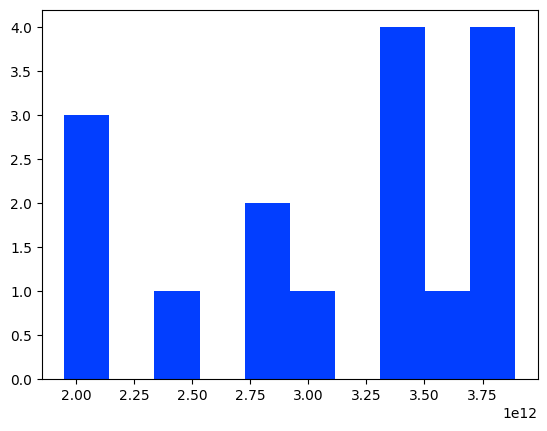

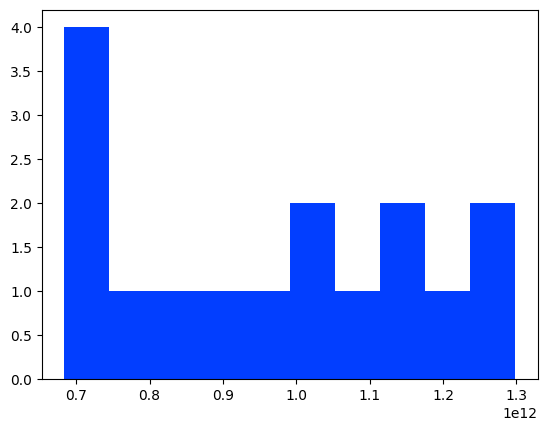

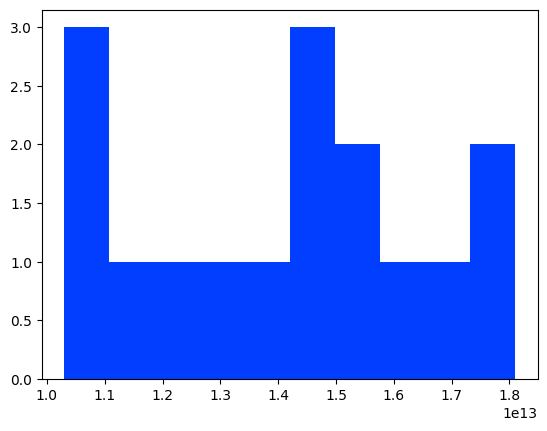

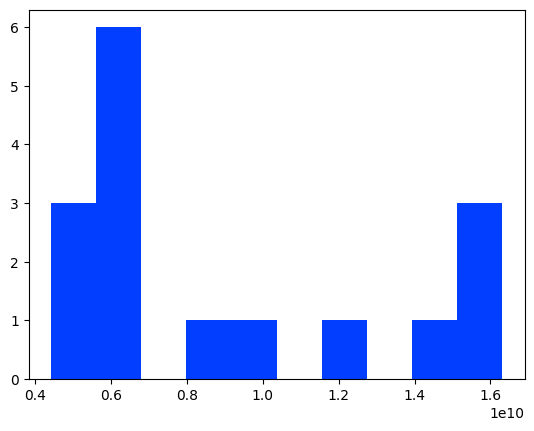

In [55]:
for con in clist:
    country = df[df.Country==con]
    plt.hist(country.GDP)
    plt.show()
    plt.close()
#no normal distributions

## Making dummy variables

In [56]:
df = pd.get_dummies(df, columns = ['Country','Year'], drop_first = True)

In [57]:
df = df.apply(pd.to_numeric, errors = "coerce")

In [63]:
df = df.rename(columns = {"Life expectancy at birth (years)":"life_expectancy_years", "Country_United States of America":"Country_United_States_of_America"})

In [65]:
df.columns

Index(['life_expectancy_years', 'GDP', 'Country_China', 'Country_Germany',
       'Country_Mexico', 'Country_United_States_of_America',
       'Country_Zimbabwe', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015'],
      dtype='object')

In [66]:

# Remove the target variable column to create the predictors (optional step, just for clarity)
X = df.drop(columns=["life_expectancy_years"])

# Fit the model using the formula interface
model = sm.OLS.from_formula("life_expectancy_years ~ " + " + ".join(X.columns), data=df)
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     life_expectancy_years   R-squared:                       0.972
Model:                               OLS   Adj. R-squared:                  0.964
Method:                    Least Squares   F-statistic:                     120.8
Date:                   Sat, 28 Dec 2024   Prob (F-statistic):           1.01e-48
Time:                           15:06:17   Log-Likelihood:                -191.97
No. Observations:                     96   AIC:                             427.9
Df Residuals:                         74   BIC:                             484.4
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [70]:
pvalues = results.pvalues
coefficients = results.params

significant_vars = pvalues[pvalues <= 0.05].index  # Get significant variable names
significant_coeffs = coefficients[significant_vars]

significant_coeffs

Intercept                                   7.638137e+01
Country_China[T.True]                      -2.750324e+00
Country_Germany[T.True]                     1.892412e+00
Country_Mexico[T.True]                     -2.898641e+00
Country_United_States_of_America[T.True]    4.727288e+00
Country_Zimbabwe[T.True]                   -2.891481e+01
Year_2008[T.True]                           2.579623e+00
Year_2009[T.True]                           2.957218e+00
Year_2010[T.True]                           3.494475e+00
Year_2011[T.True]                           4.376960e+00
Year_2012[T.True]                           4.878231e+00
Year_2013[T.True]                           5.368810e+00
Year_2014[T.True]                           5.834998e+00
Year_2015[T.True]                           6.276207e+00
GDP                                        -4.047660e-13
dtype: float64

### Results of analysis: ###
The idea is that the significant variables of life standard are years (multiple), countries (multiple), and GDP. 
For the years, we see the significant years being:
- 2008-2015(positive correlation): If you were in the years 2008-2015, there is a positive correlation to higher living standards.
- Germany and the United States (positive correlation): Being in the US or Germany positively correlates with higher living standards.
- Zimbabwe and Mexico (Negative correlation): Being in Mexico or Zimbabwe was significantly negatively correlated with lower living standards.
- GDP (negative correlation): Surprisingly, GDP was very low and significantly correlated with decreased living standards. The idea is that GDP can increase, but the wages spent do not keep up with inflation or other cost increases, which means reduced living standards. Additionally, we can look at the increase in GDP as impacting countries differently. If the US and Germany increase their productivity, that gain might be captured and funnelled more equally than in countries like Zimbabwe and Mexico. Making a wealthy person more wealthy will perhaps not increase the general living standard in the country.